In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:

df = pd.read_csv('DailyDelhiClimateTest.csv')


print(df.head())

print(df.info())


         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None


In [4]:
print(df.isnull().sum())

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [5]:
df['date']=pd.to_datetime(df['date'])

In [6]:
df.set_index('date',inplace=True)

In [12]:
df['meantemp'] = df['meantemp'].fillna(method='ffill')
df['humidity'] = df['humidity'].fillna(method='ffill')
df['wind_speed'] = df['wind_speed'].fillna(method='ffill')

<ipython-input-12-3f9a03122a9d>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['meantemp'] = df['meantemp'].fillna(method='ffill')
<ipython-input-12-3f9a03122a9d>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['humidity'] = df['humidity'].fillna(method='ffill')
<ipython-input-12-3f9a03122a9d>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['wind_speed'] = df['wind_speed'].fillna(method='ffill')


In [13]:
print(df.isnull().sum())

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [14]:
print(df.duplicated().sum())

0


In [17]:
df['meanpressure'] = df['meanpressure'].fillna(method='ffill')

<ipython-input-17-45bfd73ddce6>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['meanpressure'] = df['meanpressure'].fillna(method='ffill')


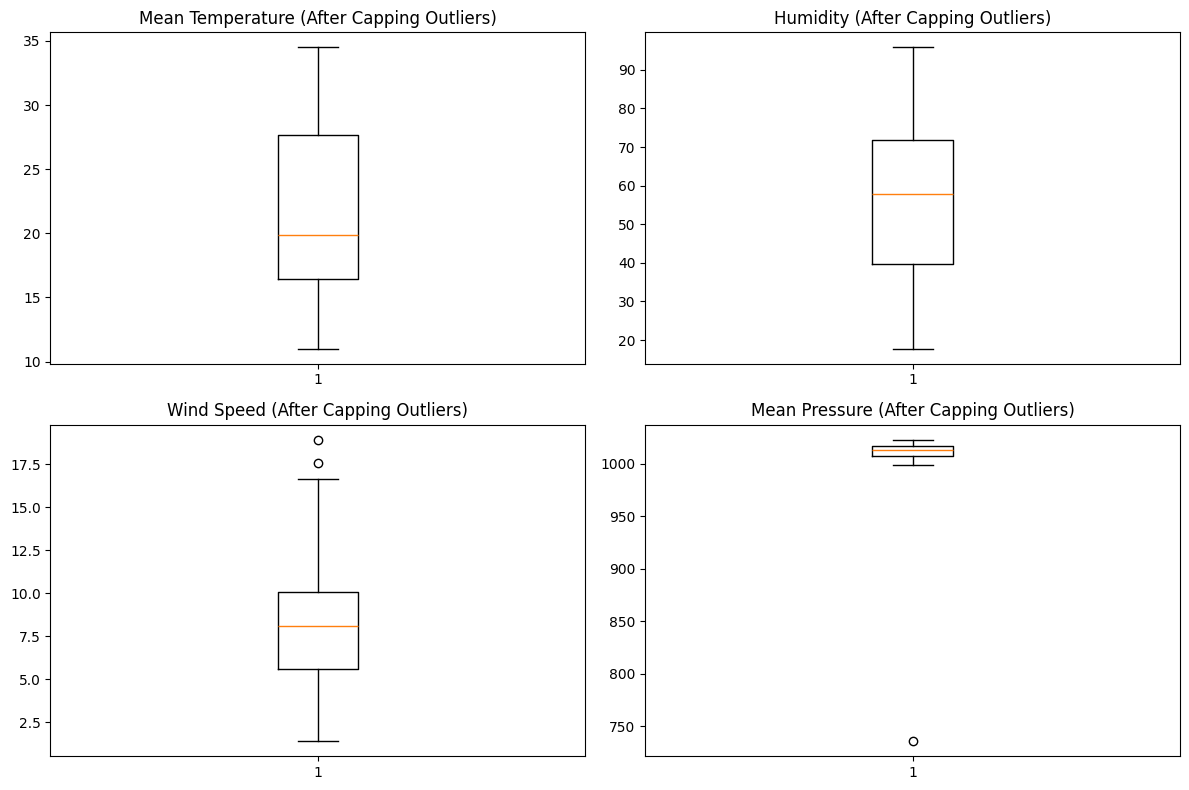

In [18]:

def cap_outliers(column, threshold=3):
    mean = column.mean()
    std = column.std()
    return np.where(column > mean + threshold * std, mean + threshold * std,
                    np.where(column < mean - threshold * std, mean - threshold * std, column))

df['meantemp'] = cap_outliers(df['meantemp'])
df['humidity'] = cap_outliers(df['humidity'])
df['wind_speed'] = cap_outliers(df['wind_speed'])
df['meanpressure'] = cap_outliers(df['meanpressure'])

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].boxplot(df['meantemp'])
axs[0, 0].set_title('Mean Temperature (After Capping Outliers)')

axs[0, 1].boxplot(df['humidity'])
axs[0, 1].set_title('Humidity (After Capping Outliers)')

axs[1, 0].boxplot(df['wind_speed'])
axs[1, 0].set_title('Wind Speed (After Capping Outliers)')

axs[1, 1].boxplot(df['meanpressure'])
axs[1, 1].set_title('Mean Pressure (After Capping Outliers)')

plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


            meantemp  humidity  wind_speed  meanpressure
date                                                    
2017-01-01  0.209066  0.872396    0.077393      0.000000
2017-01-02  0.319149  0.761651    0.086010      0.984221
2017-01-03  0.260047  0.821416    0.150062      0.984414
2017-01-04  0.327660  0.669797    0.180217      0.975245
2017-01-05  0.314421  0.732480    0.109157      0.970487


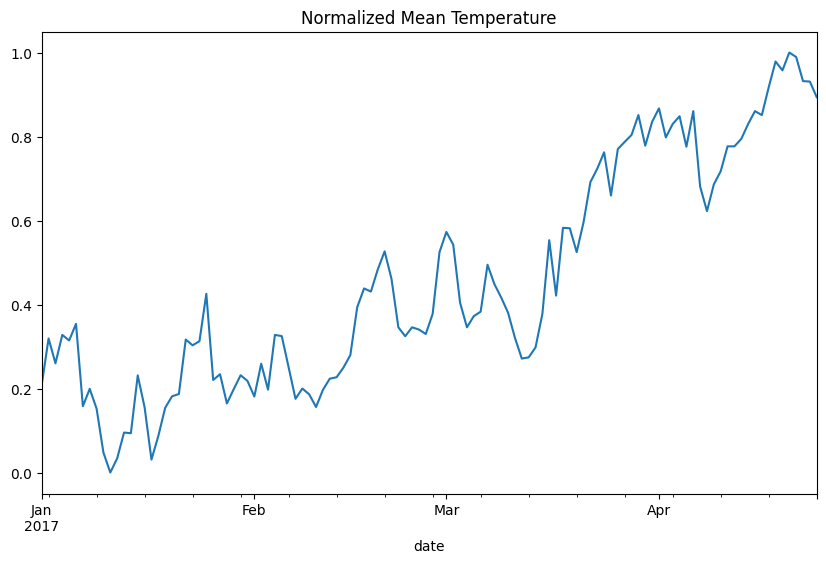

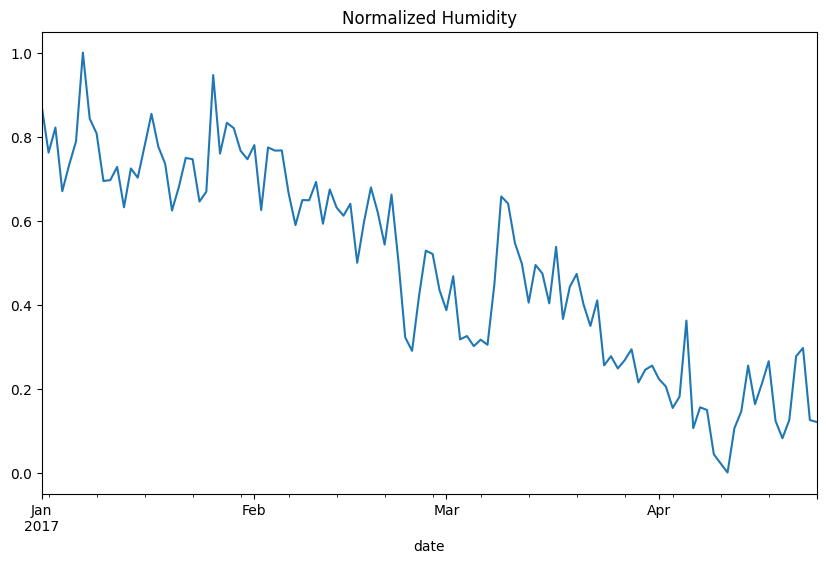

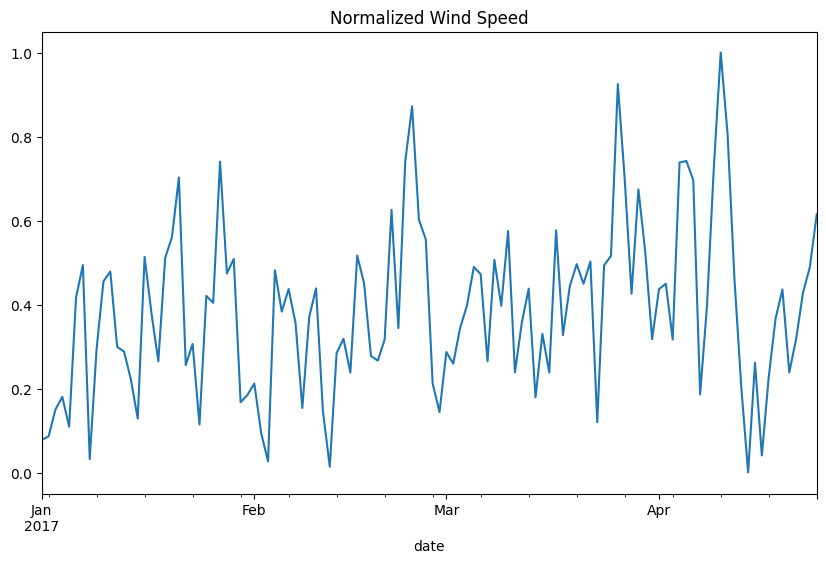

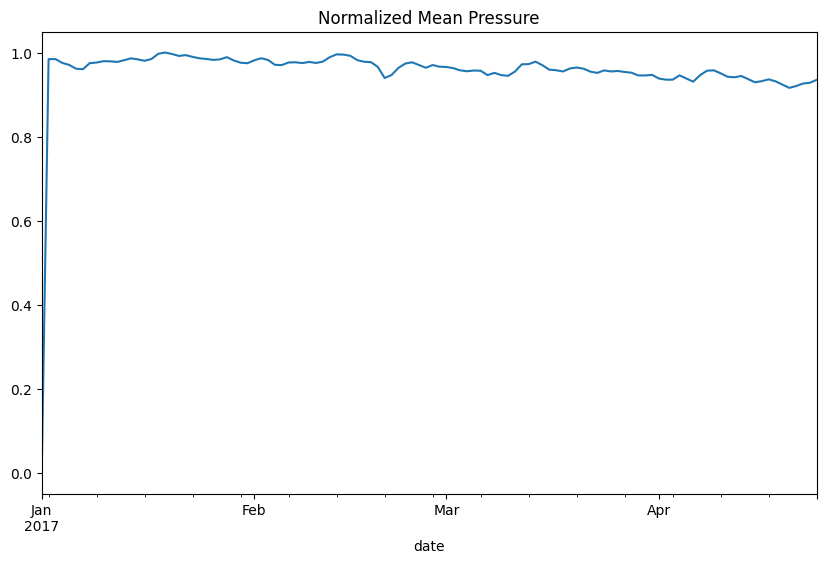

In [21]:

scaler = MinMaxScaler()
df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']] = scaler.fit_transform(df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])

print(df.head())


df['meantemp'].plot(figsize=(10, 6), title='Normalized Mean Temperature')
plt.show()

df['humidity'].plot(figsize=(10, 6), title='Normalized Humidity')
plt.show()

df['wind_speed'].plot(figsize=(10, 6), title='Normalized Wind Speed')
plt.show()

df['meanpressure'].plot(figsize=(10, 6), title='Normalized Mean Pressure')
plt.show()


In [22]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

dates = []
temperatures = []

start_date = datetime(2023, 1, 1)
for i in range(100):
    date_variants = [
        start_date.strftime('%Y-%m-%d'),
        start_date.strftime('%d/%m/%Y'),
        start_date.strftime('%b %d, %Y'),
        start_date.strftime('%m-%d-%Y')
    ]
    date_entry = random.choice(date_variants + [np.nan])
    dates.append(date_entry)
    lues
    temp_variants = [
        round(random.uniform(20, 35), 1),
        f'{random.randint(20, 35)}C',
        'NaN',
        np.nan,
        'thirty',
        random.choice([100, -20])
    ]
    temperatures.append(random.choice(temp_variants))

    if random.random() < 0.1:
        dates.append(date_entry)
        temperatures.append(temp_variants[0])

    start_date += timedelta(days=1)


large_time_series_df = pd.DataFrame({'Date': dates, 'Temperature': temperatures})

large_time_series_df.to_csv('large_uncleaned_time_series_data.csv', index=False)


In [23]:

df = pd.read_csv('large_uncleaned_time_series_data.csv')

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df = df.sort_values('Date')
df['Temperature'] = df['Temperature'].astype(str).str.extract('(\d+\.?\d*)')[0]
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')

df['Temperature'] = df['Temperature'].interpolate(method='linear')

df = df.drop_duplicates(subset=['Date'])

lower_bound = 15
upper_bound = 40
df = df[(df['Temperature'] >= lower_bound) & (df['Temperature'] <= upper_bound)]

df.to_csv('cleaned_time_series_data.csv', index=False)


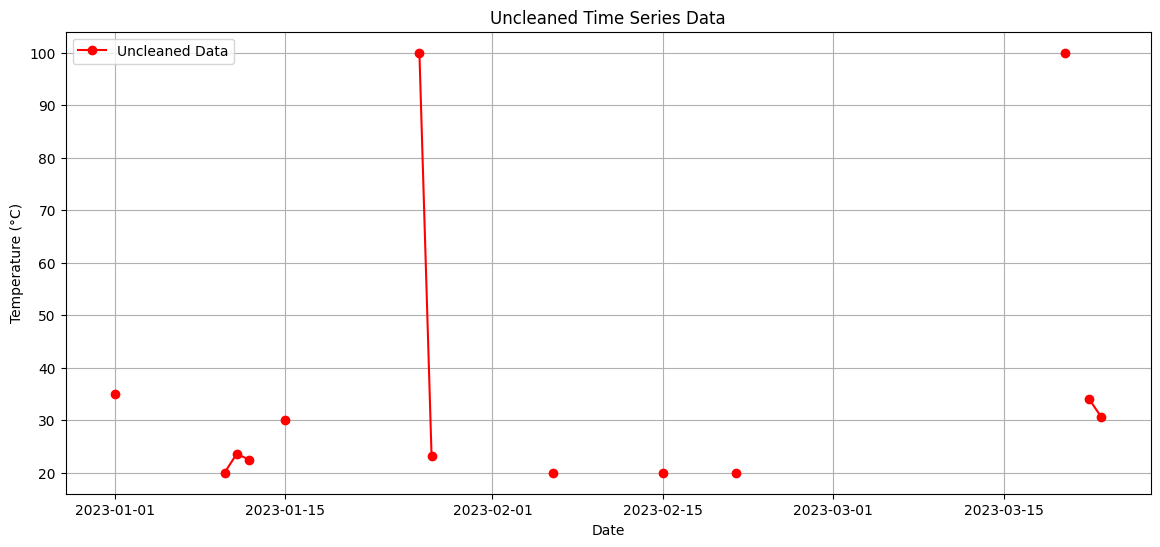

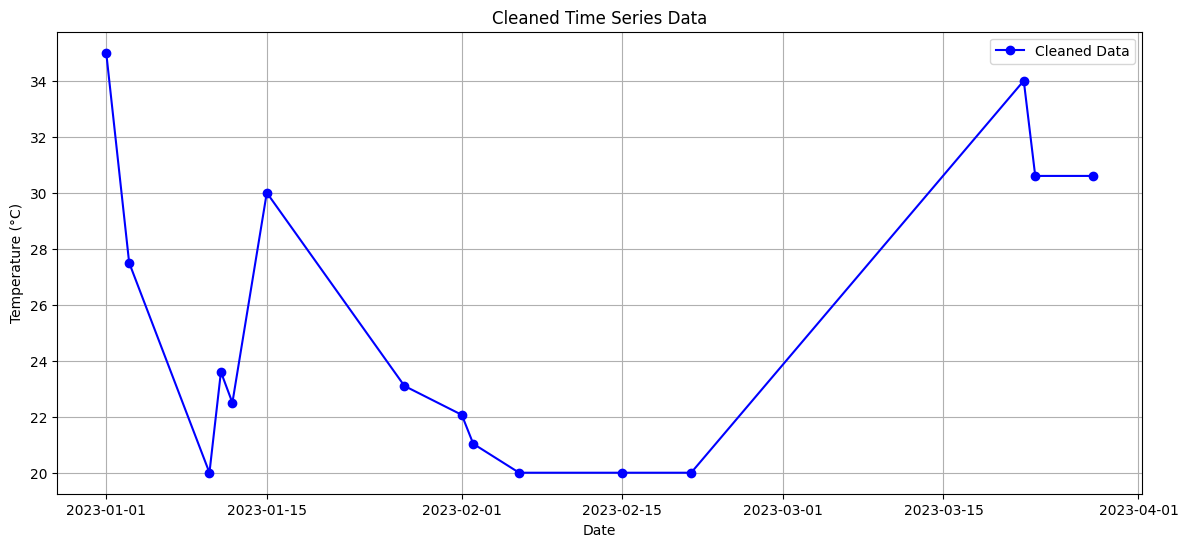

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df_uncleaned = pd.read_csv('large_uncleaned_time_series_data.csv')

df_uncleaned['Date'] = pd.to_datetime(df_uncleaned['Date'], errors='coerce')

df_uncleaned['Temperature'] = df_uncleaned['Temperature'].astype(str).str.extract('(\d+\.?\d*)')[0]
df_uncleaned['Temperature'] = pd.to_numeric(df_uncleaned['Temperature'], errors='coerce')

plt.figure(figsize=(14, 6))
plt.plot(df_uncleaned['Date'], df_uncleaned['Temperature'], marker='o', linestyle='-', color='red', label='Uncleaned Data')
plt.title('Uncleaned Time Series Data')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


df_cleaned = df_uncleaned.dropna(subset=['Date'])

df_cleaned = df_cleaned.sort_values('Date')

df_cleaned['Temperature'] = df_cleaned['Temperature'].interpolate(method='linear')

df_cleaned = df_cleaned.drop_duplicates(subset=['Date'])

df_cleaned = df_cleaned[(df_cleaned['Temperature'] >= 15) & (df_cleaned['Temperature'] <= 40)]
plt.figure(figsize=(14, 6))
plt.plot(df_cleaned['Date'], df_cleaned['Temperature'], marker='o', linestyle='-', color='blue', label='Cleaned Data')
plt.title('Cleaned Time Series Data')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

df_cleaned.to_csv('cleaned_time_series_data.csv', index=False)
